# SIR modelling using Cellular Automata

In this lab we need to use several python packages, so our first job is to import some libraries to help us out:

*   numpy - allows for advanced maths functions
*   matplotlib - helps us draw plots
*   random - used to generate randon numbers
*   math - provides access to the mathematical functions
*   pandas - helps with data analysis and manipulation to display summary statistics
*   seaborn - data visualization library based on matplotlib














In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import math
import matplotlib.patches as mpatches

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns


The next job is to set up a grid of cells (in this case 50*50), with a single infected individual and a simulation of 80 steps.

In [27]:
# number of rows and columns in each grid
col = 50
row = 50

# initial number of infected cells
infected = 1

# number of steps in simulation
num_steps = 80

# global 3D array to store grid at each timestep
state = np.array([[[0] * row] * col] * num_steps)

Next we initialise the grid

*   Setting all cell values to 0 (susceptible)
*   Pick num_infected random cell(s) and set to 1 (infected)

In [28]:
# function to set the initial state
def initialise_state():

    # (susceptible = 0, infected = 1, recovered = 2)

    # Set everything to zero - susceptible
    cells = [[0 for i in range(row)] for j in range(col)]

    # pick random infected cell(s), set = 1
    for x in range(0, infected) :
      cells[random.randint(0, row-1)][random.randint(0, col-1)] = 1
    return cells


In order to update the state, we need a function that will count the number of infected neighbours.  The function requires a grid and an i, j index for the cell we want to count the neighbours of.

In [29]:
# for cell i, j in grid count the number of infected neighbouring cells (moore neighbourhood)
def count_infected_neighbours(grid, i, j):
    count = 0
    for x, y in (
            (i - 1, j), (i + 1, j), (i, j - 1),
            (i, j + 1), (i - 1, j - 1), (i - 1, j + 1),
            (i + 1, j - 1), (i + 1, j + 1)):
        if not (0 <= x < len(grid) and 0 <= y < len(grid[x])):
            # out of bounds
            continue
        # check if the neighbour is infected (state = 1), if so add to count
        if grid[x][y] == 1:
            count += 1
    return count

We are now able to update the state, creating a new array (the next generation).  

*   The first thing we do is copy the previous array
*   Next we set the empirical values for our probability function
*   then we iterate over each cell in the array, and
> 1. count the number of infected neighbours
> 2. calculate the probability of infection
> 3. generate a random number to compare with the probability of infection
> 4. Check if the cell is susceptible (state=0), and if it is compare the probability of infection to the random number.  If the value of the random number is < probability of infection we change the value of the cell in the new array to infected (state=1)
> 5. Check if the cell is infected (state=1), and if it is, we compare the value of the random number to the probability of recovery.  If the value of the random number is < probability of recovery,  we change the value of the cell in the new array to recovered (state=2)
> 6. Otherwise, the cell value in the new array (this generation) remains the same as the value in the previous array (previous generation)










In [32]:
def update_state(previous_array):

    # copy previous array
    new_array = np.copy(previous_array)

    # set the empirical values for our probability function
    a = -1.5
    b = 0.6

    # for each cell in new array
    for i in range(row):
      for j in range(col):

          # count number of neighbours
          num_inf_neighbours = count_infected_neighbours(previous_array, i, j)

          # calculate probability of infection - p=1/(1+exp(-(-a+b*number of infected neighbours)))
          prob_infection = 1/(1+math.exp(-(a+b*num_inf_neighbours)))

          # generate a random number
          rand = random.random()

          # if susceptible, count number of infected neighbours to see if catch infection,
          if (previous_array[i][j] == 0 and rand < prob_infection):
             new_array[i][j] = 1

          # if infected check whether can set to recovered, p = 0.5
          if (previous_array[i][j] == 1 and rand < 0.4):
            new_array[i][j] = 2

    return new_array

def update_state_GOL(previous_array):

  # copy previous array
  new_array = np.copy(previous_array)

  # for each cell in new array
  for i in range(row):
    for j in range(col):

        # count number of neighbours
        num_inf_neighbours = count_infected_neighbours(previous_array, i, j)

        # generate a random number
        rand = random.random()

        # A live cell with less than 2 live neighbours dies with the probability of 90%

        # A live cell with greater that 3 live neighbours dies with the probability of 92%

        # A live cell with 2 or 3 live neighbours stays alive

        # A dead cell with exactly 3 live neighbours comes alive with the probability of 95%


  return new_array


Now we can run the simulation.  We first create the initial state (generation 0), then call update state to create a new array for each generation, creating num_steps generations in total.

In [33]:
def run_simulation():

    state[0]= initialise_state()

    for t in range(1, num_steps):
        # when repurposing the simulation in the tasks, use update_state_GOL() instead of update_state()
        state[t] = update_state(state[t-1])
        # state[t] = update_state_GOL(state[t-1])

    return

run_simulation()

This next bit of code lets us visualise a grid

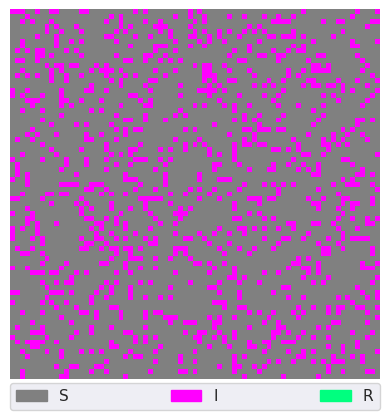

In [34]:

# mapping colours to (susceptible = 0, infected = 1, recovered = 2)
cmap = mpl.colors.ListedColormap(['gray','magenta','springgreen'])

# function to generate visual grid
def array_plot(array):
    ax.imshow(
    array,
    cmap = cmap,
    vmin=0, vmax=2
    )
    g_patch = mpatches.Patch(color='gray', label= 'S')
    m_patch = mpatches.Patch(color='magenta', label= 'I')
    s_patch = mpatches.Patch(color='springgreen', label= 'R')
    ax.legend(handles=[g_patch, m_patch, s_patch], bbox_to_anchor=(0, -0.01, 1, 0), mode="expand" , ncol=3, borderaxespad=0)
    return

fig, ax = plt.subplots()
ax.axis("off")
array_plot(state[1])

This next bit of code, joins each of the grid visualisations together in an animation

In [35]:
def animate(i):

    array_plot(state[i])

    return

# Create an animation object which:
# - animate the Figure, `fig`array_plot(state[i])
# - using the function `animate`
# - for len(state) number of frames
# - where each frame lasts 100 milliseconds
anim = FuncAnimation(fig, animate, frames=len(state), interval=100)

# Display the animation in the notebook
HTML(anim.to_jshtml())

This final bit of code creates a plot of the summary statistics.  for each generation it:

*   Counts the number of susceptible, infected and recovered cells
*   Adds the counts to a pandas dataframe
*   uses the seaborn library to create a line graph of the values at each generation






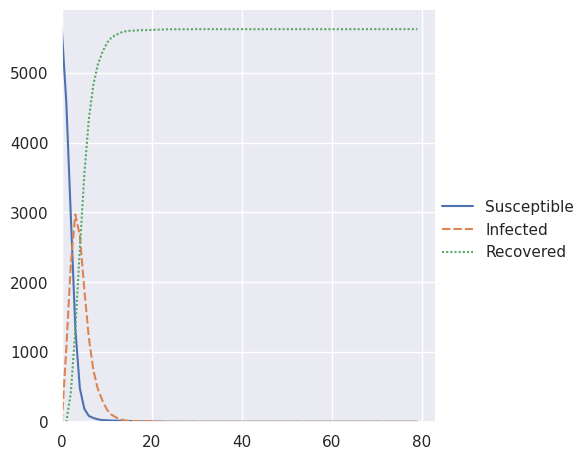

In [36]:
# Summary data

# functions to count the number of susceptible, infected and recovered cells
def count_susceptible(grid):
  count = 0
  for i in range(row):
      for j in range(col):
          if grid[i][j] == 0:
            count +=1
  return count

def count_infected(grid):
  count = 0
  for i in range(row):
      for j in range(col):
          if grid[i][j] == 1:
            count +=1
  return count

def count_recovered(grid):
  count = 0
  for i in range(row):
      for j in range(col):
          if grid[i][j] == 2:
            count +=1
  return count

# create dataframe
summary_data = pd.DataFrame(columns = ['Susceptible', 'Infected', 'Recovered'])
for i in range(num_steps):
  summary_data = summary_data.append({'Susceptible' : count_susceptible(state[i]),
                                      'Infected' : count_infected(state[i]),
                                      'Recovered' : count_recovered(state[i])},
                                     ignore_index=True
                                     )
# print(summary_data)

# plot summary data
sns.set_theme()

g = sns.relplot(data=summary_data, kind="line").set(
    xlim=(0,None),
    ylim=(0,None),
)

# Tasks

1.   Have a look at what happens between state[0] and state[1].  Can you see that in state 1, lots of cells become infected even though they have no infected neighbours.  Why do you think this is?  Can you write an *if statement* to fix this?
2.   In the code above the rate of recovery is wrong in the code.  Can you fix this?
3.   Have a play with the value of the initial number of infected cells
4.   Can you increase the array size to 75*75 (you could go much higher but it may take some time to run the simulation and the animation)
5.   Edit the infection probability (the easiest way to do this is to change the values of *a* and *b*)

# Some more difficult tasks

The previous tasks, encouraged you to tweak some of the parameters of the simulation.  These next tasks involve you adding to the update function we provided

1.   Alter the update_state(previous_array) function, so that recovered cells have a 10% probability of becoming susceptible again
2.   Add a new state - "dead".  If a cell is infected, and it does not recover, there should be a 5% probability that the individual dies.  Dont forget to update the bit of code lets us visualise a grid and provides the summary statistics too









# Repurposing the Simulation

1.   Can you adapt the code to simulate the Game of Life we discussed in the presentation.  Recall the rules:

*   A live cell with less than 2 live neighbours dies with the probability of 90%
*   A live cell with greater that 3 live neighbours dies with the probability of 92%
*   A live cell with 2 or 3 live neighbours stays alive
*   A dead cell with exactly 3 live neighbours comes alive with the probability of 95%

2.   Don't forget to have an appropriate number of live and dead cells in the initial generation
3.   Don't forget to update the bit of code lets us visualise a grid and provides the summary statistics too



# Introducing a second disease

We don't expect you all to finish the tasks we have set, but for those of you who are very confident in python, you may want to:

1.   Update the code to introduce a second disease.  Make it so that being infected with the second disease increases the probability you will become infected with the first disease.

